<a href="https://colab.research.google.com/github/bksat90/ImageSegmentation/blob/main/Image_Segmentation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installation of KerasCV.
!pip install -q --upgrade keras-cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 37.4 MB/s eta 0:00:00


In [2]:
# import libraries
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import keras
import keras_cv

from keras import layers
from keras_cv import bounding_box
from keras_cv import visualization
from random import shuffle
from PIL import Image
from pycocotools.coco import COCO
from pycocotools.coco import COCO

%matplotlib inline

Using TensorFlow backend


In [3]:
# Import and mount Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# # Unzip the dataset file and store it in a folder called images.
# !unzip "/content/drive/MyDrive/RMiDS/RM_Segmentation_Assignment_dataset.zip" -d "/content/drive/MyDrive/RMiDS/coco2017/"

In [5]:
# Load paths for the COCO dataset annotation files
train_data_path = "/content/drive/MyDrive/RMiDS/coco2017/train-300"
train_annotation_file = f"{train_data_path}/labels.json"
coco_train = COCO(train_annotation_file)

val_data_path = "/content/drive/MyDrive/RMiDS/coco2017/validation-300"
val_annotation_file = f"{train_data_path}/labels.json"
coco_val = COCO(val_annotation_file)

loading annotations into memory...
Done (t=0.56s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [10]:
def EDAbar(coco):
  """This function generates exploratory data analysis in bar chart
     coco - object for train or test data set
  """

  target_classes = ["cake", "car", "dog", "person"]
  # load the categories
  catIDs = coco.getCatIds(catNms=target_classes)
  cats = coco.loadCats(catIDs)

  # category names
  category_names = [cat['name'].title() for cat in cats]

  # Get category counts
  category_counts = [coco.getImgIds(catIds=[cat['id']]) for cat in cats]
  category_counts = [len(img_ids) for img_ids in category_counts]

  plt.figure()
  plt.bar(category_names, category_counts, align="center", color="blue")
  plt.xlabel('Count',fontsize=10)
  plt.ylabel('Category',fontsize=10)
  plt.title('Category Distribution in COCO Dataset',fontsize=10)

  plt.show()

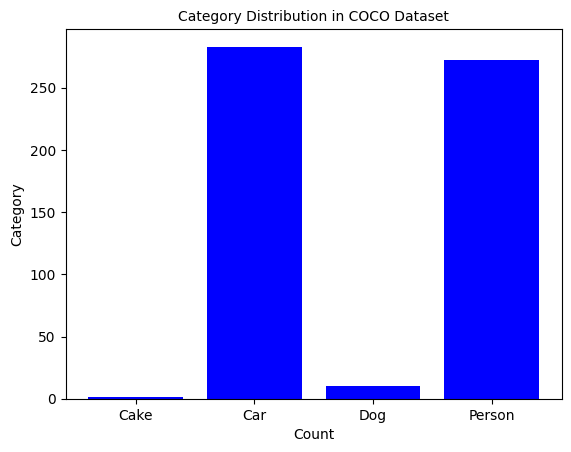

In [11]:
# EDA for training data set
EDAbar(coco_train)

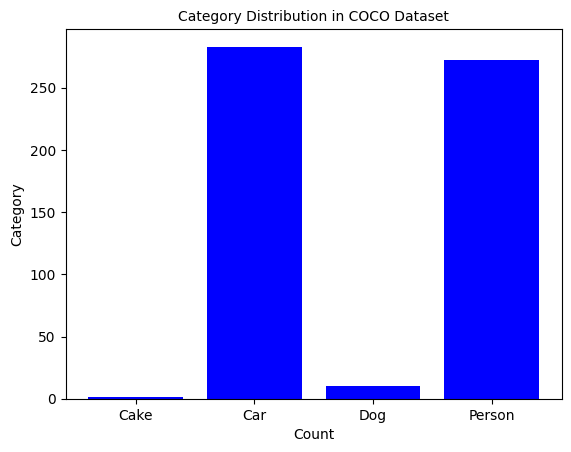

In [12]:
# EDA for training data set
EDAbar(coco_val)

In [17]:
target_classes = ["cake", "car", "dog", "person"]
train_images = []
val_images =[]

# Iterate over each individual class in the list
for class_name in target_classes:
    # training data set
    train_images_categories = coco_train.getCatIds(catNms=class_name)
    train_images_IDs = coco_train.getImgIds(catIds=train_images_categories)
    train_images += coco_train.loadImgs(train_images_IDs)

    # test data set
    val_images_categories = coco_val.getCatIds(catNms=class_name)
    val_images_IDs = coco_val.getImgIds(catIds=val_images_categories)
    val_images += coco_val.loadImgs(val_images_IDs)

566